# <center>Machine Learning Project Code</center>

<a class="anchor" id="top"></a>

## <center>*01 - Exploratory Data Analysis*</center>

** **



# Table of Contents  <br>


1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data) <br><br>
    
2. [Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)
    
   2.1 [Variable Exploration](#2.1-Variable-Exploration) <br>
   
   &emsp; 2.1.1 [Univariate Analysis](#2.1.1-Univariate-Analysis) <br>
   
   &emsp; 2.1.2 [Bivariate Analysis](#2.1.2-Bivariate-Analysis) <br><br>
  
3. [Data Cleaning & Preprocessing](#3.-Data-Cleaning-&-Preprocessing)

   3.1 [Duplicates](#3.1-Duplicates) <br>
   
   3.2 [Feature Engineering](#3.2-Feature-Engineering) <br>
   
   &emsp; 3.2.1 [3.2.1 Class Grouping](#3.2.1-Class-Grouping) <br>
   
   &emsp; 3.2.2 [Feature Creation](#3.2.2-Feature-Creation) <br><br>

4. [Export](#4.-Export)


** **

This notebook will consist of Exploratory Data Analysis and Data Cleaning and Preprocessing. To explore the data, several statistical methods and visualisations were used. In the Data Cleaning and Preprocessing, Duplicates will be addressed, Feature Engineering will be performed and missing values will be treated with simple methods (eg. fill with median). Then the treated data will be exported to be used in the following notebooks.

Data Scientist Manager: António Oliveira, **20211595**

Data Scientist Senior: Tomás Ribeiro, **20240526**

Data Scientist Junior: Gonçalo Pacheco, **20240695**

Data Analyst Senior: Gonçalo Custódio, **20211643**

Data Analyst Junior: Ana Caleiro, **20240696**

** **


# 1. Importing Libraries & Data

In this section, we set up the foundation for our project by importing the necessary Python libraries and loading the dataset. These libraries provide the tools for data manipulation, visualization, and machine learning modeling throughout the notebook. Additionally, we import the historical claims dataset, which forms the core of our analysis. 

In [1]:
import pandas as pd
import numpy as np

# Preprocessing
import utils as u

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
import viz as v
import map_ as map_

# from ydata_profiling import ProfileReport

%matplotlib inline

pd.set_option('display.max_columns', None)
# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

**Import Data**

In [2]:
# Load training data
df = pd.read_csv('./data/train_data.csv', index_col = 'Claim Identifier')

# Load testing data
test = pd.read_csv('./data/test_data.csv', index_col = 'Claim Identifier')

# Display the first 3 rows of the training data
df.head(3)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0


# 2. Exploratory Data Analysis
This section is dedicated to conducting an in-depth Exploratory Data Analysis (EDA) to comprehend the dataset’s structure, statistical properties, and inherent patterns. Through systematic analysis, we aim to identify key relationships among variables, detect potential anomalies, and evaluate the completeness and quality of the data. The findings from this stage serve as a critical foundation for subsequent data preprocessing and model development, ensuring that informed and data-driven decisions guide the overall analytical workflow.

<a href="#top">Top &#129033;</a>

**Profile Report**

In [3]:
# profile = ProfileReport(
#     df, 
#     title='Data',
#     correlations={
#         "pearson": {"calculate": True},
#         "spearman": {"calculate": False},
#         "kendall": {"calculate": False},
#         "phi_k": {"calculate": False},
#         "cramers": {"calculate": False},
#     },
# )

# profile

From using a `Profile Report` we were able to identify some possible problems about variables:
- WCB Decision has constant value "Not Work Related"
- Alternative Dispute Resolution is highly imbalanced (97.3%)
- C-3 Date has 406226 (68.4%) missing values
- First Hearing Date has 442673 (74.6%) missing values
- IME-4 Count has 460668 (77.6%) missing values
- OIICS Nature of Injury Description has 593471 (100.0%) missing values
- Zip Code is an unsupported type, check if it needs cleaning or further analysis
- Average Weekly Wage has 335450 (56.5%) zeros
- Birth Year has 25081 (4.2%) zeros
- Claim Injury Type (Target) has 19445 (3.3%) missing values and is imbalanced

And about the dataset itself:
- Dataset has 1103 (0.2%) duplicate rows

The same method was applied to test data

In [4]:
# profile_test = ProfileReport(
#     test, 
#     title='Data',
#     correlations={
#         "pearson": {"calculate": True},
#         "spearman": {"calculate": False},
#         "kendall": {"calculate": False},
#         "phi_k": {"calculate": False},
#         "cramers": {"calculate": False},
#     },
# )

# profile_test

From using a `Profile Report` for the test data we were able to identify some possible problems about variables:
- Alternative Dispute Resolution is highly imbalanced (97.5%)
- COVID-19 Indicator is highly imbalanced (94.3%)
- First Hearing Date has 344947 (88.9%) missing values
- IME-4 Count has 352726 (90.9%) missing values
- OIICS Nature of Injury Description has 387975 (100.0%) missing values

And about the test dataset itself: 
- Dataset has 2 (< 0.1%) duplicate rows

There are also columns that are present in the train data but not in the test data (apart from our Target variable):
- Agreement Reached
- WCB Decision

After using `Profile Report`, we will also employ well known methods for basic statistics, such as `describe`, `info` and `shape`, as well as print the unique values for each column.

In [5]:
df.describe(include='object').T

,count,unique,top,freq
Accident Date,570337,5539,2020-03-01,1245
Alternative Dispute Resolution,574026,3,N,571412
Assembly Date,593471,1096,2020-03-06,1422
Attorney/Representative,574026,2,N,392291
C-2 Date,559466,2475,2021-05-11,1847
C-3 Date,187245,1648,2021-04-21,350
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,42.114270,14.256432,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545375.0,491.088321,6092.918120,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,1886.767604,414.644423,0.0,1965.0,1977.0,1989.0,2018.0
IME-4 Count,132803.0,3.207337,2.832303,1.0,1.0,2.0,4.0,73.0
Industry Code,564068.0,58.645305,19.644175,11.0,45.0,61.0,71.0,92.0
OIICS Nature of Injury Description,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WCIO Cause of Injury Code,558386.0,54.381143,25.874281,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,558369.0,41.013839,22.207521,1.0,16.0,49.0,52.0,91.0
WCIO Part Of Body Code,556944.0,39.738146,22.365940,-9.0,33.0,38.0,53.0,99.0
Agreement Reached,574026.0,0.046665,0.210921,0.0,0.0,0.0,0.0,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type     

In [8]:
df.shape

(593471, 32)

In [9]:
# Loop through each column in the DataFrame
for column in df.columns:
    
    # Check if the number of unique values in the column is less than 20
    if df[column].nunique() < 20:
        
        print(f"Unique values in '{column}': {df[column].unique()}")
        print(f"Number of unique values: {df[column].nunique()}\n")

Unique values in 'Alternative Dispute Resolution': ['N' nan 'Y' 'U']
Number of unique values: 3

Unique values in 'Attorney/Representative': ['N' 'Y' nan]
Number of unique values: 2

Unique values in 'Carrier Type': ['1A. PRIVATE' nan '2A. SIF' '4A. SELF PRIVATE' '3A. SELF PUBLIC'
 'UNKNOWN' '5D. SPECIAL FUND - UNKNOWN'
 '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)'
 '5C. SPECIAL FUND - POI CARRIER WCB MENANDS']
Number of unique values: 8

Unique values in 'Claim Injury Type': ['2. NON-COMP' '4. TEMPORARY' nan '3. MED ONLY' '5. PPD SCH LOSS'
 '6. PPD NSL' '1. CANCELLED' '8. DEATH' '7. PTD']
Number of unique values: 8

Unique values in 'COVID-19 Indicator': ['N' nan 'Y']
Number of unique values: 2

Unique values in 'District Name': ['SYRACUSE' 'ROCHESTER' 'ALBANY' nan 'HAUPPAUGE' 'NYC' 'BUFFALO'
 'BINGHAMTON' 'STATEWIDE']
Number of unique values: 8

Unique values in 'Gender': ['M' 'F' nan 'U' 'X']
Number of unique values: 4

Unique values in 'Medical Fee Region': ['I' 'II' nan 'IV' 'UK'

From these, we were able to conclude that the dataset had 593471 rows and 32 columns. 

Additionally, we noticed that:
- WCB Decision only had 1 unique value
- We have 4 different values for Gender
- Age ranges from 0 to 117
- Birth Year ranges from 0 to 2018


There is also a column which is always null, **OIICS Nature of Injury Description**.

## 2.1 Variable Exploration

Incoherencies, can compromise the integrity of the analysis and the performance of machine learning models. By systematically identifying and addressing these issues, we aim to enhance data quality and ensure the dataset is both accurate and reliable for subsequent preprocessing and modeling stages.

<a href="#top">Top &#129033;</a>

In this section we will start by dropping the features that exist in the train data (df) but not in the test, as well `OIICS Nature of Injury Description`, which is always null.

We will also correct the date datatypes in both df and test.

Then, we will individually analyze each variable to better understand it.

In [10]:
columns = ['Agreement Reached', 'WCB Decision', 'OIICS Nature of Injury Description']

In [11]:
df = df.drop(columns = columns, axis = 1)
test = test.drop(columns = columns[-1], axis = 1)

In [12]:
# List of columns to convert to datetime
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']

# Apply pd.to_datetime() to each column in the list for both df and test
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    test[col] = pd.to_datetime(test[col], errors='coerce')

Having made these initial transformations, we will start the exploration by comparing the minimum, average and maximum values of both df and test datasets, for all numeric variables

In [13]:
num_columns = [col for col in df.columns if 
               pd.api.types.is_numeric_dtype(df[col])]

obj_columns = [col for col in df.columns if 
               isinstance(df[col].dtype, pd.CategoricalDtype) or 
               df[col].dtype == 'object']

In [14]:
num_stats_compare = u.num_stats(df, test, num_columns)
num_comparison_df = pd.DataFrame(num_stats_compare).T
num_comparison_df

,DF Mean,Test Mean,DF Std,Test Std,DF Min,Test Min,DF 25%,Test 25%,DF 50%,Test 50%,DF 75%,Test 75%,DF Max,Test Max
Age at Injury,42.114270,41.414944,14.256432,14.501056,0.0,0.0,31.0,30.0,42.0,40.0,54.0,53.0,117.0,114.0
Average Weekly Wage,491.088321,183.343831,6092.918120,3542.310214,0.0,0.0,0.0,0.0,0.0,0.0,841.0,0.0,2828079.0,1950317.0
Birth Year,1886.767604,1875.383466,414.644423,444.659075,0.0,0.0,1965.0,1967.0,1977.0,1980.0,1989.0,1992.0,2018.0,2019.0
IME-4 Count,3.207337,2.118131,2.832303,1.465406,1.0,1.0,1.0,1.0,2.0,2.0,4.0,2.0,73.0,18.0
Industry Code,58.645305,58.653581,19.644175,18.710501,11.0,11.0,45.0,45.0,61.0,61.0,71.0,71.0,92.0,92.0
WCIO Cause of Injury Code,54.381143,53.335678,25.874281,26.176833,1.0,1.0,31.0,29.0,56.0,56.0,75.0,74.0,99.0,99.0
WCIO Nature of Injury Code,41.013839,38.373674,22.207521,20.966100,1.0,1.0,16.0,10.0,49.0,43.0,52.0,52.0,91.0,91.0
WCIO Part Of Body Code,39.738146,31.516109,22.365940,23.359950,-9.0,-9.0,33.0,15.0,38.0,36.0,53.0,51.0,99.0,99.0
Number of Dependents,3.006559,3.000284,2.000801,1.997982,0.0,0.0,1.0,1.0,3.0,3.0,5.0,5.0,6.0,6.0


From this table, the main conclusions are:
- `Average Weekly Wage` mean values in DF (491) are much larger than in test (183)
- `Average Weekly Wage` values in the 75% percentile are much larger in df (841) than in test (0), which indicates a distribution shift between DF and test sets

Apart from these, there are no other significant differences in the numeric columns of both sets.

In [15]:
obj_stats_compare = u.obj_stats(df, test, obj_columns)
obj_comparison_df = pd.DataFrame(obj_stats_compare).T
obj_comparison_df

,DF Unique,Test Unique,DF Mode,Test Mode,DF Top Value Count,Test Top Value Count
Alternative Dispute Resolution,3,3,N,N,571412,386314
Attorney/Representative,2,2,N,N,392291,306476
Carrier Name,2046,1598,STATE INSURANCE FUND,STATE INSURANCE FUND,111144,66189
Carrier Type,8,7,1A. PRIVATE,1A. PRIVATE,285368,201827
County of Injury,63,63,SUFFOLK,QUEENS,60430,40358
COVID-19 Indicator,2,2,N,N,546505,385434
District Name,8,8,NYC,NYC,270779,187972
Gender,4,4,M,M,335218,215343
Industry Code Description,20,20,HEALTH CARE AND SOCIAL ASSISTANCE,HEALTH CARE AND SOCIAL ASSISTANCE,114339,72207
Medical Fee Region,5,5,IV,IV,265981,182276


From this table, the main conclusions are:
- `Carrier Type` has 8 unique values in DF, but only 7 in test
- `WCIO Part Of Body Description` has 54 unique values in DF, but only 51 in test
- `County of Injury` Mode is SUFFOLK in DF, but QUEENS in test
- `WCIO Cause of Injury Description` and `WCIO Part Of Body Description` have different modes from DF to test

### 2.1.1 Univariate Analysis

<a href="#top">Top &#129033;</a>

In this section we will individually analyse each variable.

### Numerical Variables

In [ ]:
v.plot_numeric_histograms(df)

**Age at Injury**

As one can see there are some unexpectedly high values in age in both datasets

In [ ]:
print(df['Age at Injury'].describe())
print()
print(test['Age at Injury'].describe())

**Average Weekly Wage**

In [ ]:
print(df['Average Weekly Wage'].describe())
print()
print(test['Average Weekly Wage'].describe())

**Birth Year**

There are also very unlikely minimum values for this variable, which will later be addressed

In [ ]:
print(df['Birth Year'].describe())
print()
print(test['Birth Year'].describe())

**IME-4 Count**

It is interesting to compare the maximum values of both datasets

In [ ]:
print(df['IME-4 Count'].describe())
print()
print(test['IME-4 Count'].describe())

**Number of Dependents**

In [ ]:
df['Number of Dependents'].describe()

**Univariate Analysis for Numerical Variables Conclusions**

*1. Histograms*
- `Age at Injury`: Nearly normal distribution with a peak between 30 and 50 years. Some minor right-skewness due to outliers above 100 years.
- `Average Weekly Wage`: Extremely right-skewed distribution with most values near 0 and a few outliers at very high values.
- `Birth Year`: Concentrated around the late 20th century, with invalid entries (e.g., 0) skewing the distribution.
- `IME-4 Count`: Heavily right-skewed with the majority of values concentrated at 1 or 2, and a few extreme outliers (e.g., > 60).
- `Industry Code `: Multimodal distribution with peaks around specific values, indicating distinct groupings.
- `WCIO Cause of Injury Code `: Uniformly distributed across multiple categories with no significant anomalies.
- `WCIO Nature of Injury Code `: Multimodal distribution with a notable peak around 40, reflecting common injury types.
- `WCIO Part of Body Code `: Balanced distribution with peaks around 20–40, representing frequently affected body parts.
- `Number of Dependents `: Nearly uniform distribution across categories from 0 to 6, indicating no dominant category.

---

*2. Variables*

`Age at Injury`
- Nearly normal distribution with some extreme outliers (e.g., ages > 100 years).
- Training and test sets are consistent in distribution.


`Average Weekly Wage`
- Highly skewed distribution with most values near 0.
- Severe outliers present, especially in the test set.


`Birth Year`
- Presence of invalid values (0) that should be treated as missing.
- Most data falls between the 1960s and 1990s.
- Consistent distribution between training and test sets.


`IME-4 Count`
- Right-skewed distribution with potential outliers in the training set.
- Test set has a smaller range of values compared to the training set.


`Number of Dependents`
- Uniform distribution with values ranging from 0 to 6.
- No significant outliers observed.

### Categorical Variables

<a href="#top">Top &#129033;</a>

**Claim Injury Type**

We can see how skewed the distribution of our target variable is

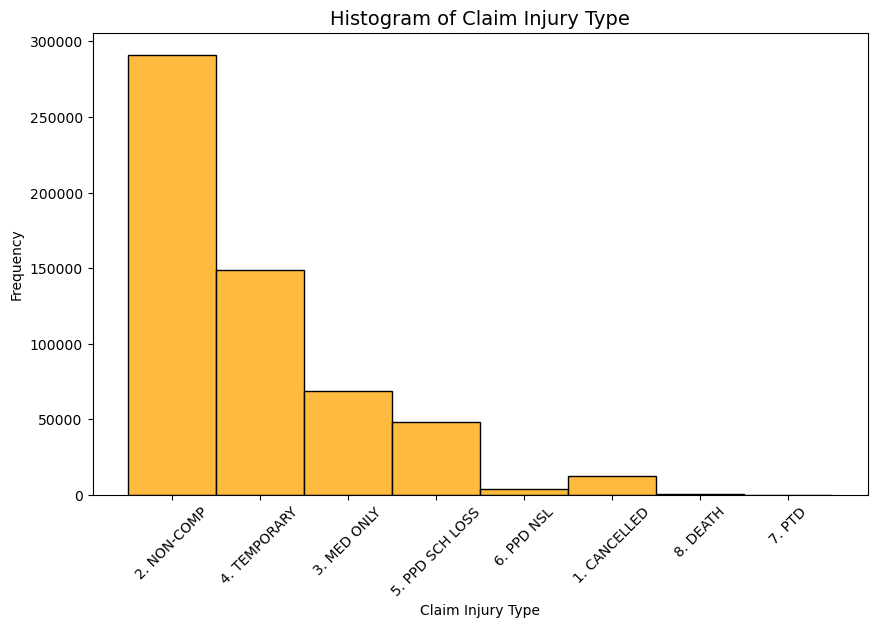

In [16]:
v.plot_histogram(df, 'Claim Injury Type')

In [17]:
print(df['Claim Injury Type'].value_counts())

Claim Injury Type
2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: count, dtype: int64


**Alternative Dispute Resolution**

AS Y an N categories have very few values, we may consider dropping them. However, we must explore its relation with other features first

In [ ]:
df['Alternative Dispute Resolution'].value_counts()

In [ ]:
v.plot_histogram(df, 'Alternative Dispute Resolution')

v.plot_histogram(test, 'Alternative Dispute Resolution')

**Attorney/Representative**

In [ ]:
df['Attorney/Representative'].value_counts()

In [ ]:
v.plot_histogram(df, 'Attorney/Representative')

v.plot_histogram(test, 'Attorney/Representative')

**Carrier Name**

Due to the amount of different Carriers, it is hard to find a plot that shows them all in an understandable way. Therefore we decided so see which were the most common words in this variable by plotting a WordCloud.

This Wordcloud showed us that *Insurance* and *Ins* is quite common. 

In [ ]:
freq = df['Carrier Name'].value_counts()
freq

In [ ]:
v.generate_wordcloud(df, column_name='Carrier Name', 
                   title='Word Cloud of Carrier Names')

**Carrier Type**

As we previously identified, there are 2 categories present in DF (5A, 5C) that do not exist in test. This can be confirmed by the 2 visualisations bellow

In [ ]:
df['Carrier Type'].value_counts()

In [ ]:
v.plot_histogram(df, 'Carrier Type')

v.plot_histogram(test, 'Carrier Type')

**County of Injury**

Nothing better to visualise Counties than a map.

In [ ]:
map_.map_('./geojson-counties-fips.json', df)

In [ ]:
v.plot_histogram(df, 'County of Injury',
                 rotation = 90)

v.plot_histogram(test, 'County of Injury',
                 rotation = 90)

**COVID-19 Indicator**

In [ ]:
df['COVID-19 Indicator'].value_counts()

In [ ]:
v.plot_histogram(df, 'COVID-19 Indicator')

v.plot_histogram(test, 'COVID-19 Indicator')

**District Name**

In [ ]:
df['District Name'].value_counts()

In [ ]:
v.plot_histogram(df, 'District Name')

v.plot_histogram(test, 'District Name')

**Gender**

In [ ]:
df['Gender'].value_counts()

In [ ]:
v.plot_histogram(df, 'Gender')

v.plot_histogram(test, 'Gender')

**Industry Code Description**

In [ ]:
df['Industry Code Description'].value_counts()

In [ ]:
v.plot_histogram(df, 'Industry Code Description',
                rotation = 90)

v.plot_histogram(test, 'Industry Code Description',
                rotation = 90)

**Medical Fee Region**

In [ ]:
df['Medical Fee Region'].value_counts()

In [ ]:
v.plot_histogram(df, 'Medical Fee Region')

v.plot_histogram(test, 'Medical Fee Region')

**WCIO Cause of Injury Description**

Here the Wordcloud is not as insightful, as the most common word appears to be a stopword

In [ ]:
v.plot_histogram(df, 'WCIO Cause of Injury Description', 
                          rotation = 90)


v.plot_histogram(test, 'WCIO Cause of Injury Description', 
                          rotation = 90)

In [ ]:
v.generate_wordcloud(df, 'WCIO Cause of Injury Description')

**WCIO Nature of Injury Description**

In [ ]:
v.plot_histogram(df, 'WCIO Nature of Injury Description', 
                          rotation = 90)


v.plot_histogram(test, 'WCIO Nature of Injury Description', 
                          rotation = 90)

In [ ]:
v.generate_wordcloud(df, 'WCIO Nature of Injury Description')

**WCIO Part Of Body Description**

In DF, even though teh category 'Multiple' is still common, there are 2 categories that are even more common ('Lower Back Area' and 'Knee'), when comparing to the test data.

In [ ]:
v.plot_histogram(df, 'WCIO Part Of Body Description', 
                          rotation = 90)


v.plot_histogram(test, 'WCIO Part Of Body Description', 
                          rotation = 90)

In [ ]:
v.generate_wordcloud(df, 'WCIO Part Of Body Description')

**Zip Code**

In [ ]:
df['Zip Code'].value_counts()

**Univariate Analysis for Categorical Variables Conclusions**

`Alternative Dispute Resolutio``
- Dominated by `N` category; `Y` and `U` are rare, indicating an imbalanced distribution.

`Attorney/Representative `
- Two categories (`N`, `Y`); majority are `N`, with about one-third in `Y`.

`Carrier Name`
- Highly imbalanced with over 2,000 unique values; "STATE INSURANCE FUND" dominates.
- The words "Insurance" and "Ins" are quite common.

`Carrier Type `
- Dominated by `1A. PRIVATE`, followed by `3A. SELF PUBLIC` and `2A. SIF`; minor categories are sparse.

` County of Injury`
- Skewed distribution; counties like "BRONX" and "WESTCHESTER" are most frequent.

`COVID-19 Indicator`
- Heavily imbalanced with most cases in `N` and a small fraction in `Y`.

`District Name `
- "NYC" contributes the majority of cases, followed by "ALBANY" and "HAUPPAUGE."

`Gender`
- Dominated by `M` and `F`; minor categories (`U`, `+`) are rare.

`Industry Code Description Industry Code Description `
- "Health Care and Social Assistance" and "Public Administration" are most frequent; minor industries like "Mining" are rare.

`Medical Fee Region`
- Region `IV` dominates, followed by `I` and `II`; `UK` (unknown) is minimal.

`WCIO Cause of Injury Description`
- Common causes include "Falling or Slip/Trip" and "Struck by Object"; many low-frequency categories exist.

`WCIO Nature of Injury Description`
- Distinct peaks for "Contusion," "Sprain," and "Strain"; many low-frequency categories that may require aggregation.

`WCIO Part of Body Description`
- Frequently affected areas include "Lower Back," "Wrists," and "Multiple Body Parts"; notable entries for "Upper Extremities" and "Neck."

`Zip Code`
- Over 6,000 unique values; a few zip codes like 11236 and 10940 dominate, while many have minimal occurrences.

### 2.1.2 Bivariate Analysis

<a href="#top">Top &#129033;</a>

### Numerical vs Numerical

In [ ]:
# Remove rows with missing values
temp = df.dropna()

# Select numerical columns for correlation analysis
corr_data = temp.select_dtypes(include=['number'])

# Compute the Spearman correlation matrix (Pearson is the default)
correlation_matrix = corr_data.corr(method='spearman')

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr', linewidths=0.1)
plt.show()

From plotting a correlation matrix for numeric features, we can conclude that there are no highly positive correlations. Nonetheless, there is a highly negative correlation (-0.97) between `Birth Year`and `Age at Injury`. 

This negative correlation was to be expected, as the age can be computed from the birth year, and the higher the birth year, the lower the age.

This problem will be addressed later in the project.

In [ ]:
v.plot_pairwise_relationship(df)

Above we are plotting scatterplots for all combinations of numeric variables, looking for linear relationships between them. Since this matrix is mirrored on the diagonal, we decided to only display half of it.

This allowed us to conclude that there are no linear relationships when combining two numeric variables.

**Bivariate Analysis: Numerical vs Numerical Conclusions**

*1. Correlation Matrix*

- **Strong Negative Correlation** :
  - `Age at Injury` and `Birth Year` (-0.97) due to expected inverse relationship (younger individuals have more recent birth years).
- **Moderate Positive Correlation**:
  - `WCIO Cause of Injury Code` and `WCIO Nature of Injury Code` (0.15), indicating a potential relationship between these attributes.
  - `Average Weekly Wage` and `WCIO Cause of Injury Code` (0.16), suggesting a slight trend between wages and injury cause.
- **Low or No Correlation**:
  - Most other pairings show weak correlations (near 0), indicating limited linear relationships.

*2. Pair Plot Observations*

- **Scattered Relationships**:
  - Numerical variables show scattered plots, reflecting weak linear relationships across most pairings.
  - Some distinct patterns are visible between `Age at Injury` and `Birth Year`, aligned with their high negative correlation.
- **Clusters**:
  - Clusters appear in categorical-like variables such as `WCIO Cause of Injury Code` and `WCIO Nature of Injury Code`, reflecting discrete groupings.

### Numerical vs Categorical

<a href="#top">Top &#129033;</a>

In [57]:
discrete = ['Birth Year', 'IME-4 Count', 'Industry Code',
            'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
            'WCIO Part Of Body Code', 'Number of Dependents']

continuous = ['Age at Injury', 'Average Weekly Wage']

categorical = [col for col in df.select_dtypes(include=['object']).columns
               if df[col].nunique() < 9]

**Bivariate Analysis: Numerical vs Categorical**

- **Discrete Numerical Variables:** 
  - `Birth Year`, `IME-4 Count`, `Industry Code`, `WCIO Cause of Injury Code`, `WCIO Nature of Injury Code`, `WCIO Part Of Body Code`, `Number of Dependents` <br><br>
  
- **Continuous Numerical Variables:**
  - `Age at Injury`, `Average Weekly Wage` <br><br>
  
- **Categorical Variables:**
  - Selected columns with fewer than 9 unique categories for focused analysis.

#### Categorical vs Numerical Discrete

In [ ]:
for column in discrete:
    plot_cat_vs_num(df, 'Claim Injury Type', column, plot_type = 'box')

In [ ]:
for column in discrete:
    v.plot_cat_vs_num(df, 'Claim Injury Type', column, plot_type = 'bar')

**Bivariate Analysis: Categorical vs Numerical (Discrete) Conclusions**

1. `Claim Injury Type vs Birth Year`
   - Minimal variation across claim types, with similar median birth years for most categories.
   - Minor outliers in earlier years observed. <br><br>

2. `Claim Injury Type vs IME-4 Count` 
   - Noticeable increase in IME-4 count for severe claims like `PTD` and `Death`.
   - Distribution is skewed towards lower counts for other types.  <br><br>

3. `Claim Injury Type vs Industry Code` 
   - Variability observed across claim types, with `PPD SCH LOSS` and `PTD` showing higher medians.
   - Outliers present in all categories.  <br><br>

4. `Claim Injury Type vs WCIO Cause of Injury Code`
   - Slight upward trend for `PTD` and `Death`.
   - Distribution mostly consistent across other claim types.  <br><br>

5. `Claim Injury Type vs WCIO Nature of Injury Code` 
   - Higher medians for `Death` and `PTD`.
   - Other categories clustered around similar ranges.  <br><br>

6. `Claim Injury Type vs WCIO Part Of Body Code` 
   - Similar trends as WCIO nature of injury; higher medians for severe cases (`PTD`, `Death`).
   - Slightly larger range for complex injuries.  <br><br>

7. `Claim Injury Type vs Number of Dependents` 
   - Stable medians across all claim types.
   - Minor variation for `PTD` and `Death`, with slightly higher averages.

**Categorical vs Numerical Continuous**

In [ ]:
v.plot_categ_cont(df, categorical, continuous)

**Bivariate Analysis: Categorical vs Numerical (Continuous) Conclusions**

1. `Alternative Dispute Resolution vs Age at Injury` 
   - Slightly higher median age for `Y` category compared to `N`.
   - Significant outliers present in the `N` category. <br><br>

2. `Alternative Dispute Resolution vs Average Weekly Wage` 
   - Median wages are higher for the `Y` category.
   - Extreme outliers dominate the distribution, especially in `N`.<br><br>

3. `Attorney/Representative vs Age at Injury` 
   - Cases with an attorney (`Y`) have slightly higher median age.
   - Wider distribution and outliers are observed in both categories.<br><br>

4. `Attorney/Representative vs Average Weekly Wage` 
   - Weekly wages are significantly higher for cases with an attorney (`Y`).
   - Distribution is heavily right-skewed due to extreme outliers.<br><br>

5. `Carrier Type vs Age at Injury` 
   - Minor variability across carrier types, with similar medians.
   - Wider range of ages observed for certain types (e.g., `5D` and `2A`).<br><br>

6. `Carrier Type vs Average Weekly Wage` 
   - Most carrier types have comparable median wages.
   - Outliers are prominent across all categories, distorting the range.<br><br>

7. `Claim Injury Type vs Age at Injury` 
   - Median age slightly increases for more severe claim types (`PTD`, `Death`).
   - All categories exhibit a similar spread with noticeable outliers.<br><br>

8. `Claim Injury Type vs Average Weekly Wage` 
   - Wages are significantly higher for severe claims like `PTD` and `Death`.
   - Heavy right-skewness and extreme outliers across all claim types.<br><br>

9. `COVID-19 Indicator vs Age at Injury` 
   - Cases with `Y` (COVID-related) show slightly higher median age than `N`.
   - Distribution for both categories includes some outliers.<br><br>

### Categorical vs Categorical

In this section we are going to include relevant visualisations of the interaction between categorical data. We will start with interactions between non-target categorical variables, and after doing so, produce some plots to better understand how each variable related to the target `Claim Injury Type`.

<a href="#top">Top &#129033;</a>

**County of Injury vs Medical Fee Region**

This visualisation is interesting, because we were not expecting for each county to be subdivided in as many as 5 different Medical Fee Regions.

In [ ]:
unique_region_counts = df.groupby('County of Injury')['Medical Fee Region'].nunique()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=unique_region_counts.index, y=unique_region_counts.values, color='orange')
plt.title('Number of Unique Medical Fee Regions per County of Injury', fontsize=14)
plt.xlabel('County of Injury', fontsize=12)
plt.ylabel('Number of Unique Medical Fee Regions', fontsize=12)
plt.xticks(rotation=90)
plt.show()


**Alternative Dispute Resolution vs Claim Injury Type**

In [ ]:
v.plot_crosstab(df, 'Alternative Dispute Resolution', 
              'Claim Injury Type', annot_kws={"rotation": 45})

**Attorney/Representative vs Claim Injury Type**

In [ ]:
v.plot_crosstab(df, 'Attorney/Representative', 
              'Claim Injury Type', annot_kws={"rotation": 45})

**Carrier Type vs Claim Injury Type**

It is worth noting that `Carrier Type` categories 1, 2, 3, 4 include most observations of all injury types

In [ ]:
v.plot_crosstab(df, 'Carrier Type', 
              'Claim Injury Type', annot_kws={"rotation": 45})

**COVID-19 Indicator vs Claim Injury Type**

In [ ]:
v.plot_crosstab(df, 'COVID-19 Indicator', 
              'Claim Injury Type', annot_kws={"rotation": 45})

**Gender vs Claim Injury Type**

In [ ]:
v.plot_crosstab(df, 'Gender', 
              'Claim Injury Type', annot_kws={"rotation": 45})

**Medical Fee Region vs Claim Injury Type**

In [ ]:
v.plot_crosstab(df, 'Medical Fee Region', 
              'Claim Injury Type', annot_kws={"rotation": 45})

**Bivariate Analysis: Categorical vs Categorical**

1. `County of Injury vs Medical Fee Region`
- Most counties exhibit data across all five medical fee regions, suggesting broad geographic coverage in medical claims. <br><br>

2. `Alternative Dispute Resolution vs Claim Injury Type`
- `N` dominates in all injury types, especially in non-compensable and temporary claims. Rare cases of `Y` exist in other categories.<br><br>

3. `Attorney/Representative vs Claim Injury Type`
- Most claims without attorney involvement (`N`) are non-compensable or temporary. Claims with attorneys (`Y`) are notable in temporary and permanent total disability categories.<br><br>

4. `Carrier Type vs Claim Injury Type`
- Private carriers (`1A`) dominate all injury types, followed by self-insured public (`3A`) and state insurance fund (`2A`). Minor categories show minimal representation.<br><br>

5. `COVID-19 Indicator vs Claim Injury Type`
- Claims without COVID-19 (`N`) vastly outnumber those with COVID-19 (`Y`), although a noticeable proportion of claims with `Y` are temporary.<br><br>

6.`Gender vs Claim Injury Type` 
- Male (`M`) claims dominate most injury types, especially in temporary and non-compensable claims. Female (`F`) claims show a similar trend but at slightly lower frequencies.<br><br>

7. `Medical Fee Region vs Claim Injury Type`
- Region `IV` shows the highest volume of claims across all injury types, followed by `I` and `II`. Unknown (`UK`) entries are minimal but present in all categories.<br><br>

# 3. Data Cleaning & Preprocessing
The cleaning process involves handling missing values, correcting errors, and addressing inconsistencies identified earlier. Preprocessing includes tasks such as feature engineering, encoding categorical variables, normalizing numerical data, and splitting the data into training and testing sets. These steps are essential to ensure that the dataset is both structured and suitable for developing robust and reliable machine learning models.

<a href="#top">Top &#129033;</a>

**Claim Injury Type**

Having noted that in DF there are missing values in this variable, we must address them before continuing. Since this is our target, when missing the entire observation cannot be used for training purposes, therefore must be dropped.

In [ ]:
df[df['Claim Injury Type'].isna()]

In [61]:
# Remove rows with missing values in the 'Claim Injury Type' column
df.dropna(subset=['Claim Injury Type'], inplace=True)

Having treated our target, it must also be encoded.

In [62]:
# Map descriptive labels in 'Claim Injury Type' to numeric codes for consistency and modeling
label_mapping = {
    "1. CANCELLED": 0,
    "2. NON-COMP": 1,
    "3. MED ONLY": 2,
    "4. TEMPORARY": 3,
    "5. PPD SCH LOSS": 4,
    "6. PPD NSL": 5,
    "7. PTD": 6,
    "8. DEATH": 7
}

In [63]:
df['Claim Injury Type'] = df['Claim Injury Type'].replace(label_mapping)

## 3.1 Duplicates
In this section, we will focus on detecting and handling duplicates to ensure data integrity and improve model performance. Addressing duplicates is a crucial preprocessing step that contributes to better data quality and more reliable machine learning outcomes.

<a href="#top">Top &#129033;</a>

In [ ]:
# Identify and return rows that are duplicates in the DataFrame
df[df.duplicated()]

In [65]:
# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

## 3.2 Feature Engineering
Feature engineering is the process of transforming raw data into meaningful features to improve machine learning model performance. Effective feature engineering helps enhance predictive accuracy, reduce overfitting, and optimize model outcomes. In this section, we will explore various techniques and their impact on improving machine learning models.

<a href="#top">Top &#129033;</a>

### 3.2.1 Class Grouping

In this section we will attempt to group classes of existing features. These will later be encoded

**Carrier Type**

DF contains 8 unique values, whereas test only contains 7. The difference is in '*5C. SPECIAL FUND - POI CARRIER WCB MENANDS*'. Knowing this, we decided to group all '5' categories into a single one: 
- '5. SPECIAL FUND'

In [ ]:
print(df['Carrier Type'].value_counts())
print(' ')
print(test['Carrier Type'].value_counts())

In [67]:
mapping = {
    '5D. SPECIAL FUND - UNKNOWN': '5. SPECIAL FUND OR UNKNOWN',
    '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)': '5. SPECIAL FUND OR UNKNOWN',
    '5C. SPECIAL FUND - POI CARRIER WCB MENANDS': '5. SPECIAL FUND OR UNKNOWN',
    'UNKNOWN': '5. SPECIAL FUND OR UNKNOWN'
}

In [68]:
# Apply the mapping to standardize 'Carrier Type' values
df['Carrier Type'] = df['Carrier Type'].replace(mapping)

test['Carrier Type'] = test['Carrier Type'].replace(mapping)

**Gender**

As the number of 'X' and 'U' genders is very small compared with the others, they are going to be grouped and encoded as follows.
- M - 0
- F - 1
- U & X - U/X - 2

In [ ]:
print(df['Gender'].value_counts())
print(' ')
print(test['Gender'].value_counts())

In [70]:
mapping = {  
    'M': 'M',
    'F': 'F',
    'U': 'U/X',  
    'X': 'U/X'
}

df['Gender'] = df['Gender'].map(mapping)  
test['Gender'] = test['Gender'].map(mapping) 

Apply Ordinal Encoding

In [71]:
df['Gender Enc'] = df['Gender'].replace({'M': 0, 'F': 1, 'U/X': 2})
test['Gender Enc'] = test['Gender'].replace({'M': 0, 'F': 1, 'U/X': 2})

### 3.2.2 Feature Creation

<a href="#top">Top &#129033;</a>

**Date Columns**

For each date column, the Year, Month, Day and Week Day (0=Monday, 6=Sunday) will be extracted.

In [72]:
for column in df.columns:
    # Check if the column is a datetime type
    if pd.api.types.is_datetime64_any_dtype(df[column]) and column not in ['C-3 Date', 'First Hearing Date']:
        # Extract year, month, day and day of the week
        df[f'{column} Year'] = df[column].dt.year
        df[f'{column} Month'] = df[column].dt.month
        df[f'{column} Day'] = df[column].dt.day
        df[f'{column} Day of Week'] = df[column].dt.weekday 
        
        test[f'{column} Year'] = test[column].dt.year
        test[f'{column} Month'] = test[column].dt.month
        test[f'{column} Day'] = test[column].dt.day
        test[f'{column} Day of Week'] = test[column].dt.weekday

**TIME BETWEEN**

To compute these variables, we will assume the following timeline:
1. Accident happens (Accident Date)
2. C-2 form is filled and received (C-2 Date)
3. The claim is Assembled (Assembly Date)

**Time Between Accident and Assembly**

In [73]:
df['Accident to Assembly Time'] = (df['Assembly Date'] - df['Accident Date']).dt.days
test['Accident to Assembly Time'] = (test['Assembly Date'] - test['Accident Date']).dt.days

**Time Between C-2 Receipt and Assembly**

In [74]:
df['Assembly to C-2 Time'] = (df['Assembly Date'] - df['C-2 Date']).dt.days
test['Assembly to C-2 Time'] = (test['Assembly Date'] - test['C-2 Date']).dt.days

**Time Between Accident and C-2 Receipt**

In [75]:
df['Accident to C-2 Time'] = (df['C-2 Date'] - df['Accident Date']).dt.days
test['Accident to C-2 Time'] = (test['C-2 Date'] - test['Accident Date']).dt.days

**WCIO Codes**

All WCIO codes will be joined in a column. Before joining them, they will be transformed into integers. For this to be possible, missing values will be filled with a specific code, 0, which until now does not exist in any of the mentioned columns. We also needed to transform **WCIO Part Of Body Code** into the absolute value, since there was a negative code (-9). Before doing so, we ensured there was not any code with the same absolute number.

In [76]:
df['WCIO Part Of Body Code'] = df['WCIO Part Of Body Code'].abs()
test['WCIO Part Of Body Code'] = test['WCIO Part Of Body Code'].abs()

In [77]:
columns_to_join = [
    'WCIO Cause of Injury Code',
    'WCIO Nature of Injury Code',
    'WCIO Part Of Body Code'
]

df[columns_to_join] = df[columns_to_join].fillna(0).astype(int)
test[columns_to_join] = test[columns_to_join].fillna(0).astype(int)

df['WCIO Codes'] = df[columns_to_join].astype(str).agg(''.join, axis=1).astype(int)
test['WCIO Codes'] = test[columns_to_join].astype(str).agg(''.join, axis=1).astype(int)

**Carrier Name**

Create a binary variable `Insurance` that identifies Carrier Names that include the initials "ins".

In [78]:
df['Insurance'] = df['Carrier Name'].str.contains('ins', case=False, na=False).astype(int)
test['Insurance'] = test['Carrier Name'].str.contains('ins', case=False, na=False).astype(int)

**Zip Code**

Will be transformed into a Zip Code Valid, which evaluates the validity of the Zip Code:
- 2 for missing values
- 0 for a valid numeric value
- 1 for non-numeric zip codes

In [79]:
df['Zip Code Valid'] = df['Zip Code'].apply(
    lambda x: 2 if pd.isna(x)          
    else (1 if not str(x).isnumeric()   
          else 0))


test['Zip Code Valid'] = test['Zip Code'].apply(
    lambda x: 2 if pd.isna(x)          
    else (1 if not str(x).isnumeric()   
          else 0))

**Industry Code Description**

The descriptions of the Industries will be grouped by sectors, as follows:
- Public Services / Government:
    - Public Administration 
    - Health Care and Social Assistance 
    - Educational Services 
    - Arts, Entertainment, and Recreation 
- Business Services:
    - Professional, Scientific, and Technical Services 
    - Administrative and Support and Waste Management and Remediation
    - Information 
    - Management of Companies and Enterprises 
    - Finance and Insurance 
- Retail and Wholesale:
    - Retail Trade
    - Wholesale Trade 
    - Accommodation and Food Services 
- Manufacturing and Construction:
    - Manufacturing 
    - Construction 
- Transportation:
    - Transportation and Warehousing 
- Agriculture and Natural Resources:
    - Agriculture, Forestry, Fishing, and Hunting 
    - Mining
- Utilities 
    - Utilities
- Other Services
    - Other Services (Except Public Services)

    
Then, they will be encoded.


In [80]:
df['Industry Sector'] = df['Industry Code Description'].apply(u.group_industry)
test['Industry Sector'] = test['Industry Code Description'].apply(u.group_industry)

**Age Groups**

Creating groups for age as follows:
- Minors (0): Ages 0-17
- Adults (1): Ages 18-64
- Seniors (2): Ages 65+

In [81]:
bins = [-1, 17, 64, 117]
labels = [0, 1, 2]

df['Age Group'] = pd.cut(df['Age at Injury'], bins=bins, labels=labels, right=True)

test['Age Group'] = pd.cut(test['Age at Injury'], bins=bins, labels=labels, right=True)

Drop treated and unnecessary columns before continuing.

In [82]:
drop = ['Accident Date', 'Assembly Date', 'Industry Code Description',
        'C-2 Date', 'Zip Code', 'WCIO Cause of Injury Description',
        'WCIO Nature of Injury Description', 'WCIO Part Of Body Description']

In [83]:
df.drop(columns = drop, axis = 1, inplace = True)
test.drop(columns = drop, axis = 1, inplace = True)

# 4. Export

<a href="#top">Top &#129033;</a>

In [84]:
# df.head(2)
# test.head(2)

In [87]:
df.to_csv('./train_data_EDA.csv')
test.to_csv('./test_data_EDA.csv')